In [29]:
import pandas as pd
import numpy as np
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

from comet_ml import Experiment
import auth
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


%matplotlib inline

In [2]:
# Load pre-processed data (with engineered features & downsampled classes)

df = pd.read_csv('./data/moma_baseline_model_balanced_dataset_05_11_2011.csv')

df.head()

,index,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,...,print_keyword,drawing_paper_word,drawing_keyword,painting_keyword,photo_keyword,has_3dimensions,furniture_keyword,decorative_obj_keyword,area,is_drawing
0,67648,Catullus from the portfolio Six Latin Writers ...,Cy Twombly,5988,"(American, 1928–2011)",American,1928,2011,Male,1975-1976,...,True,False,False,False,False,False,False,False,838.20,False
1,87448,Lips from To Kiss Your Lips,Julia Jacquette,8121,"(American, born 1964)",American,1964,0,Female,1999,...,True,False,False,False,False,False,False,False,761.76,False
2,70170,Cockatoo AAA Dracula,Billy Al Bengston,472,"(American, born 1934)",American,1934,0,Male,1968,...,True,False,False,False,False,False,False,False,766.80,False
3,60790,Star I,Yamaguchi Gen,6481,"(Japanese, 1896–1976)",Japanese,1896,1976,Male,1963,...,True,False,False,False,False,False,False,False,1607.20,False
4,71552,Third Class (Terceira classe) from the series ...,Lasar Segall,5317,"(Brazilian, 1889 - 1957)",Brazilian,1889,1957,Male,1928,...,True,False,False,False,False,False,False,False,894.24,False


In [3]:
# Reset Index

df.index = df['index']
df.drop(columns='index', inplace=True)

df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,print_keyword,drawing_paper_word,drawing_keyword,painting_keyword,photo_keyword,has_3dimensions,furniture_keyword,decorative_obj_keyword,area,is_drawing
index,,,,,,,,,,,,,,,,,,,,,
67648,Catullus from the portfolio Six Latin Writers ...,Cy Twombly,5988,"(American, 1928–2011)",American,1928,2011,Male,1975-1976,One from a portfolio of seven embossed lithogr...,...,True,False,False,False,False,False,False,False,838.20,False
87448,Lips from To Kiss Your Lips,Julia Jacquette,8121,"(American, born 1964)",American,1964,0,Female,1999,One from a suite of four etchings,...,True,False,False,False,False,False,False,False,761.76,False
70170,Cockatoo AAA Dracula,Billy Al Bengston,472,"(American, born 1934)",American,1934,0,Male,1968,Lithograph,...,True,False,False,False,False,False,False,False,766.80,False
60790,Star I,Yamaguchi Gen,6481,"(Japanese, 1896–1976)",Japanese,1896,1976,Male,1963,"Lithograph, embossed and cut",...,True,False,False,False,False,False,False,False,1607.20,False
71552,Third Class (Terceira classe) from the series ...,Lasar Segall,5317,"(Brazilian, 1889 - 1957)",Brazilian,1889,1957,Male,1928,Etching,...,True,False,False,False,False,False,False,False,894.24,False


In [4]:
# Select columns to use as featureset

cols_to_use = ['long_list_of_things'
        , 'installation_keyword'
        , 'print_keyword'
        , 'drawing_paper_word'
        , 'drawing_keyword'
        , 'painting_keyword'
        , 'photo_keyword'
        , 'has_3dimensions'
        , 'is_drawing'
        , 'furniture_keyword'
        , 'decorative_obj_keyword'
        , 'area'
              ]

In [5]:
#Create labels & Training data 

y = pd.get_dummies(df['Classification'])

X = df[cols_to_use]


# Segragate Data into test, train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=88)


In [6]:
X

,long_list_of_things,installation_keyword,print_keyword,drawing_paper_word,drawing_keyword,painting_keyword,photo_keyword,has_3dimensions,is_drawing,furniture_keyword,decorative_obj_keyword,area
index,,,,,,,,,,,,
67648,False,False,True,False,False,False,False,False,False,False,False,838.200000
87448,False,False,True,False,False,False,False,False,False,False,False,761.760000
70170,False,False,True,False,False,False,False,False,False,False,False,766.800000
60790,False,False,True,False,False,False,False,False,False,False,False,1607.200000
71552,False,False,True,False,False,False,False,False,False,False,False,894.240000
...,...,...,...,...,...,...,...,...,...,...,...,...
129773,False,False,False,False,False,False,False,True,False,True,False,17826.758257
130290,False,False,False,False,False,False,False,False,False,True,False,4458.879885
132236,False,False,False,False,False,False,False,False,False,True,False,522.000000


In [7]:
# Create an experiment

# experiment = Experiment(api_key=auth.comet_api_key,
#                          project_name="artwork-classification", workspace="lazell")

In [8]:

clf = RandomForestClassifier(n_estimators=100
                             , min_samples_split=10
                             , random_state=8).fit(X_train, y_train)

In [42]:
np.arange(2,75,15)

array([ 2, 17, 32, 47, 62])

In [44]:
grid_times = {}

for number in np.arange(5,200,50):
    
    param = np.arange(1,number,20)
    param_grid = {"n_estimators": param,      # 2-100, in increments of 10
                  "min_samples_leaf": np.arange(2,75,15), # 2-75, in increments of 15
                  "criterion": ["gini", "entropy"]
                  }
    
    grid_search = GridSearchCV(clf, param_grid = param_grid)
    
    t0 = time()
    grid_search.fit(X_train, y_train)
    compute_time = time() - t0
    grid_times[len(grid_search.cv_results_)] = time() - t0
    
grid_times = pd.DataFrame.from_dict(grid_times, orient = 'index')

In [9]:
# Get Test Results

results = clf.predict(X_test)
y_pred = pd.DataFrame(columns=y_test.columns
                      , data=results
                      , index=X_test.index)

In [10]:
# Get Results
accuracy_score(y_test, y_pred)

0.852996254681648

In [11]:
print(classification_report(y_test, y_pred, target_names=y_test.columns))

                   precision    recall  f1-score   support

          Drawing       0.95      0.91      0.92       306
     Installation       0.93      0.51      0.66       150
         Painting       0.92      0.83      0.87       316
       Photograph       0.98      0.90      0.94       293
            Print       0.93      0.91      0.92       264
        Sculpture       0.78      0.76      0.77       295
decorative_object       0.98      0.88      0.93       310
        furniture       0.95      1.00      0.97       202

        micro avg       0.92      0.85      0.89      2136
        macro avg       0.93      0.84      0.87      2136
     weighted avg       0.93      0.85      0.88      2136
      samples avg       0.85      0.85      0.85      2136



/Users/katielazell-fairman/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Get Feature Importances
df_feature_importances = pd.DataFrame(data=clf.feature_importances_
                                      ,index=X_train.columns).sort_values(0, ascending=False)
df_feature_importances

,0
print_keyword,0.155949
photo_keyword,0.135879
area,0.134987
decorative_obj_keyword,0.124355
furniture_keyword,0.111035
has_3dimensions,0.092918
is_drawing,0.070906
painting_keyword,0.062235
drawing_paper_word,0.045135
installation_keyword,0.032671


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

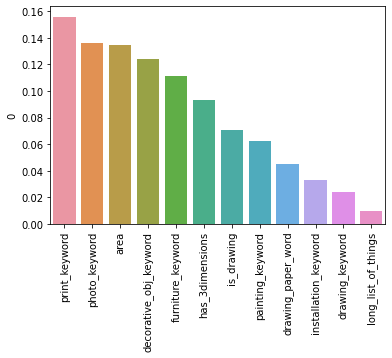

In [13]:
# Plot Importances

sns.barplot(y=df_feature_importances[0],x=df_feature_importances.index)
plt.xticks(rotation='vertical')